In [565]:
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib.pyplot import figure, show

# Dataset

In [566]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Algorithm/Bangla Fake News Detection/Dataset/LabeledAuthentic-7K.csv', engine='python', encoding='utf-8')
df.shape

(7202, 9)

In [567]:
df1= pd.read_csv('/content/drive/MyDrive/Machine Learning Algorithm/Bangla Fake News Detection/Dataset/LabeledFake-1K.csv', engine='python', encoding='utf-8')
df1.shape

(1299, 10)

In [568]:
df2= pd.read_csv('/content/drive/MyDrive/Machine Learning Algorithm/Bangla Fake News Detection/Dataset/Authentic-48K.csv', engine='python', encoding='utf-8')
df2.shape

(48678, 7)

In [569]:
df3= pd.read_csv('/content/drive/MyDrive/Machine Learning Algorithm/Bangla Fake News Detection/Dataset/Fake-1K.csv', engine='python', encoding='utf-8')
df3.shape

(1299, 7)

Merging All DataFrame

In [570]:
#merging df & df1
merge = [df,df1,df2,df3]
merged = pd.concat(merge)
merged.shape

(58478, 10)

In [571]:
#shuffle
merged = merged.sample(frac=1).reset_index(drop=True)

In [572]:
merged.columns

Index(['articleID', 'domain', 'date', 'category', 'source', 'relation',
       'headline', 'content', 'label', 'F-type'],
      dtype='object')

Columns

- articleID : ID of the news
- domain : News publisher's site name
- date : Published Date
- category : Category of the news
- source	: Source of the news. (One who can verify the claim of the news)
- relation :	Related or Unrelated. Related if headline matches with content's claim otherwise it is labeled as Unrelated
- headline	: Headline of the news
- content	: Article or body of the news
- label :	1 or 0 . '1' for authentic '0' for fake
- F-type :	Type of fake news (Clickbait, Satire, Fake(Misleading or False Context))

In [573]:
merged.head()

,articleID,domain,date,category,source,relation,headline,content,label,F-type
0,61547,jagonews24.com,2018-10-11 15:47:19,Lifestyle,NaN,NaN,স্বামী প্রতারণা করেছে? এখন কী করবেন?,"অনেক ভালোবাসা, অনেক নির্ভরতায় যার হাতটি ধরেছিল...",1.0,NaN
1,4458,somoynews.tv,2018-09-20 13:50:44,Sports,reporter,Related,চ্যাম্পিয়ন লিগ লাল কার্ড দেখে কাঁদলেন রোনালদো ...,আসরের শুরুতে জয় পেয়েছে জায়ান্টরা। রোমাকে ৩-০ গ...,0.0,NaN
2,57304,bd-pratidin.com,2018-10-10 23:40:12,National,NaN,NaN,পথযাত্রা শেষ আল্লামা মাসঊদের,বাংলাদেশ জমিয়তুল উলামার চার দিনব্যাপী পথযাত্রা...,1.0,NaN
3,40804,kalerkantho.com,2018-10-04 09:12:43,Finance,NaN,NaN,দরপতনে নতুন রেকর্ড রুপির,দরপতনে নতুন রেকর্ড গড়েছে ভারতীয় মুদ্রা রুপি। গ...,1.0,NaN
4,19411,dailyjanakantha.com,2018-09-26 18:48:17,National,NaN,NaN,বিশৃঙ্খলা করলে বিএনপিকে সমুচিত জবাব দেয়া হবে ॥...,"নিজস্ব সংবাদদাতা, রাজবাড়ী ॥ সড়ক পরিবহন ও সেতু ...",1.0,NaN


In [574]:
# details of the dataset
# This dataset is huge, so we will use "memory_usage" in df.info

def fast_intro(df):
    print("------Summary-----\n")
    print(df.info(memory_usage = "deep"))
    print("\n------Descriptive and Quartile Statistics------\n")
    print(df.describe())
    print("\n------1st 10 rows------\n")
    print(df.head(10))
    print("\n------last 10 rows------\n")
    print(df.tail(10))
    print("\n------Random 10 rows------\n")
    print(df.sample(10))

fast_intro(merged)

------Summary-----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58478 entries, 0 to 58477
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   articleID  58478 non-null  int64  
 1   domain     58478 non-null  object 
 2   date       58478 non-null  object 
 3   category   58478 non-null  object 
 4   source     8501 non-null   object 
 5   relation   8501 non-null   object 
 6   headline   58478 non-null  object 
 7   content    58478 non-null  object 
 8   label      58478 non-null  float64
 9   F-type     1299 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 233.5 MB
None

------Descriptive and Quartile Statistics------

          articleID         label
count  58478.000000  58478.000000
mean   26178.306868      0.900202
std    19379.622643      0.299733
min        1.000000      0.000000
25%     7094.000000      1.000000
50%    24555.500000      1.000000
75%    43085.750000      1.000000
m

Handling Null Value

In [575]:
merged.isnull().sum()

articleID        0
domain           0
date             0
category         0
source       49977
relation     49977
headline         0
content          0
label            0
F-type       57179
dtype: int64

In [576]:
merged.drop(['source'], axis=1, inplace=True)
merged.drop(['relation'], axis=1, inplace=True)
merged.drop(['F-type'], axis=1, inplace=True)

In [577]:
# remove articleID
merged.drop(['articleID'], axis=1, inplace=True)

# Dataset Cleaning

In [578]:
merged['domain'] = merged['domain'].astype(str)
merged['category'] = merged['category'].astype(str)
merged['label'] = merged['label'].astype(int)

In [579]:
merged.sample(10)

,domain,date,category,headline,content,label
51209,dailynayadiganta.com,2018-09-30 00:49:22,National,ডিজিটাল নিরাপত্তা আইন দিয়ে অসহায় করা হয়েছে আমাদের,তত্ত্বাবধায়ক সরকারের সাবেক উপদেষ্টা ব্যারিস্টা...,1
6384,somoynews.tv,2018-09-30 14:53:44,National,’ট্রাফিক সপ্তাহে কাঙ্ক্ষিত সফলতা আসেনি’,মাসব্যাপী ট্রাফিক কার্যক্রমে কাঙ্ক্ষিত সফলতা আ...,1
50643,channelionline.com,2018-10-04 14:35:26,International,অত্যাধুনিক ‘রিবন গান’ পরীক্ষা করবে মার্কিন সেন...,‘রিবন গান’ নামের একেবারে নতুন ধরনের একটি আগ্নে...,1
54505,kalerkantho.com,2018-09-22 16:02:03,Finance,শেনজেনে ‘সিডস ফর দ্য ফিউচার’ মাতালো বাংলাদেশি ...,হুয়াওয়ের গ্লোবাল করপোরেট সোশ্যাল রেসপনসিবিলিটি...,1
54299,bangla.bdnews24.com,2018-10-09 23:36:18,National,দক্ষিণ এশিয়ায় নৌ-পরিবহন খাতের বিপুল সম্ভাবনা আ...,মঙ্গলবার ঢাকার একটি হোটেলে এই সম্মেলনের উদ্বোধ...,1
11568,ittefaq.com.bd,2018-09-26 02:47:08,National,নাসিরনগরে মন্দির ভাঙচুর মামলায় কারাগারে ১০ জন,ব্রাহ্মণবাড়িয়ার নাসিরনগরে হিন্দু বাড়িতে হামলা ...,1
11669,jagonews24.com,2018-09-20 13:36:40,Politics,অন্তর্জ্বালা থেকেই মনগড়া বই লিখেছেন সিনহা : কাদের,সুরেন্দ্র কুমার সিনহা (এসকে সিনহা) সাবেক হওয়ার...,1
22384,banglatribune.com,2018-10-04 21:27:39,National,ব্রাহ্মণবাড়িয়ায় ট্রেনের নিচে কাটা পড়ে দুই বোনে...,ব্রাহ্মণবাড়িয়া শহরের শিমরাইল কান্দি রেলগেট এলা...,1
5108,banglanews24.com,2018-09-28 15:28:33,Miscellaneous,ক্রোয়েশিয়ার কোরআন প্রতিযোগিতায় বাংলাদেশের ছোট্...,ঢাকা: আন্তর্জাতিক হিফজুল কোরআন প্রতিযোগিতায় অং...,1
32395,dhakatimes24.com,2018-09-26 18:26:06,National,সেনানিবাসে ‘প্রয়াসের’ যুগপূর্তি উদযাপিত,বাংলাদেশ সেনাবাহিনীর পৃষ্ঠপোষকতায় পরিচালিত বিশ...,1


Handling Date

In [580]:
#merged['date']= merged['date'].apply(lambda x: x[:4] + '-' + x[5:7] + '-'+ x[8:10])
import re
allcount = 0
negCount = 0
indexList = []
print(merged.iloc[0]['date'])
for i in range(len(merged)):
  if not re.match(r'(\d{2,4}-\d{2}-\d{2,4})+',merged.iloc[i]['date']):
    #print(merged.iloc[i]['date'])
    allcount += 1
    if merged.iloc[i]['label'] is 0:
      negCount += 1
    indexList.append(i)
print(allcount)
print(negCount)

2018-10-11 15:47:19
568
0


In [581]:
merged = merged.drop(indexList)

In [582]:
merged['date']= merged['date'].apply(lambda x: x[:4] + '-' + x[5:7] + '-'+ x[8:10])
merged['date'] = pd.to_datetime(merged['date'], dayfirst=True)

In [583]:
merged = merged.sort_values(by = ['date'],ascending=False)


In [584]:
merged.head(5)

,domain,date,category,headline,content,label
40712,daily-bangladesh.com,2019-11-17,National,পেঁয়া‌জের কে‌জি যেভা‌বে ২০০ থে‌কে ক‌মে ৪০ টাকা...,কুষ্টিয়ার পৌর কাঁচাবাজারে হঠাৎ করেই কেজিতে ৪০ ...,0
39577,daily-bangladesh.com,2019-11-17,National,পেঁয়া‌জের কে‌জি যেভা‌বে ২০০ থে‌কে ক‌মে ৪০ টাকা...,কুষ্টিয়ার পৌর কাঁচাবাজারে হঠাৎ করেই কেজিতে ৪০ ...,0
40629,dhakajournals.com,2019-10-15,International,"গাঁজা সেবনে চাকরি দেবে নাসা, বেতন ১৪ লাখ!","মাদকের বিরুদ্ধে বিশ্ব যখন একাট্টা, তখন গাঁজা স...",0
13850,dhakajournals.com,2019-10-15,International,"গাঁজা সেবনে চাকরি দেবে নাসা, বেতন ১৪ লাখ!","মাদকের বিরুদ্ধে বিশ্ব যখন একাট্টা, তখন গাঁজা স...",0
49951,sharenews24.com,2019-10-13,National,সাড়ে চার কোটি টাকা ফেরত দিলেন ছাত্রলীগ নেতা,"ছাত্রলীগ নেতাদের নীতি-নৈতিকতা, মানবিকতা, দেশপ্...",0


Unique content handling

In [585]:
print("Unique Content :",len(list(set(merged['content']))))
print("Total rows :",len(merged))

Unique Content : 52617
Total rows : 57910


In [586]:
# dropping ALL duplicte values 
merged.drop_duplicates(subset ="content", 
                     keep = "first", inplace = True) 

In [587]:
merged

,domain,date,category,headline,content,label
40712,daily-bangladesh.com,2019-11-17,National,পেঁয়া‌জের কে‌জি যেভা‌বে ২০০ থে‌কে ক‌মে ৪০ টাকা...,কুষ্টিয়ার পৌর কাঁচাবাজারে হঠাৎ করেই কেজিতে ৪০ ...,0
40629,dhakajournals.com,2019-10-15,International,"গাঁজা সেবনে চাকরি দেবে নাসা, বেতন ১৪ লাখ!","মাদকের বিরুদ্ধে বিশ্ব যখন একাট্টা, তখন গাঁজা স...",0
49951,sharenews24.com,2019-10-13,National,সাড়ে চার কোটি টাকা ফেরত দিলেন ছাত্রলীগ নেতা,"ছাত্রলীগ নেতাদের নীতি-নৈতিকতা, মানবিকতা, দেশপ্...",0
13685,bangla.dhakatribune.com,2019-10-12,National,কাজ শেষে সরকারকে সাড়ে ৪ কোটি টাকা ফেরত দিলেন ঠ...,চট্টগ্রাম মহানগরীতে বরাদ্দকৃত অর্থের চেয়ে কম ট...,0
47955,bd-journal.com,2019-10-12,National,সাড়ে ৪ কোটি টাকা ফেরত দিয়ে ভাইরাল ছাত্রলীগ নেতা,‘জাপানি সংস্থা প্রকল্পের টাকা ফেরত দিলে তাদের ...,0
...,...,...,...,...,...,...
17092,motikontho.wordpress.com,2011-04-25,National,চট্টগ্রাম মেডিকেলের শিক্ষার্থীদের আবার সড়ক অবর...,"নিজস্ব মতিবেদক, চট্টগ্রাম | তারিখ: ২৫-০৪-২০১১চ...",0
43522,motikontho.wordpress.com,2011-03-31,Miscellaneous,শর্তসাপেক্ষে আলীমের জামিন | দৈনিক মতিকণ্ঠ,"ঢাকা, মার্চ ৩১ (মতিনিউজ টোয়েন্টিফোর ডটকম) — এক...",0
44099,motikontho.wordpress.com,2011-03-31,Miscellaneous,চট্টগ্রামের নেতাদের নাপাক বললেন মোদাচ্ছের | দৈ...,চট্টগ্রাম মতিনিধিপুটু মারামারি বাদ দিয়ে চট্টগ...,0
21513,motikontho.wordpress.com,2011-03-31,Sports,ভারতের নাগরিকত্ব দাবি করলেন আফ্রিদি,কূটনৈতিক মতিবেদকগতকাল ভারতের মহালিতে অনুষ্ঠিত ...,0


Data Analysis

In [588]:
merged['domain'].value_counts()

jagonews24.com           4932
kalerkantho.com          4642
banglanews24.com         4400
banglatribune.com        4137
jugantor.com             2838
                         ... 
bangla24.com.bd             1
gonews24.com                1
daily-bangladesh.com        1
dailyinqilab.com            1
sangbadprotidin24.com       1
Name: domain, Length: 91, dtype: int64

In [589]:
merged['category'].value_counts()

National         20556
International     7305
Sports            6822
Editorial         3546
Politics          3160
Miscellaneous     2811
Entertainment     2807
Finance           1268
Crime             1225
Education         1189
Lifestyle         1030
Technology         898
Name: category, dtype: int64

In [590]:
# category list for fake data
temp = merged[merged['label']==0]
temp['category'].value_counts()

National         1066
Miscellaneous     608
International     414
Sports            394
Entertainment     214
Politics          199
Editorial         176
Lifestyle         134
Education          82
Crime              76
Technology         68
Finance            56
Name: category, dtype: int64

In [591]:
from sklearn.preprocessing import LabelEncoder  

le = LabelEncoder()
merged['domain']= le.fit_transform(merged['domain'])
merged['category'] = le.fit_transform(merged['category'])

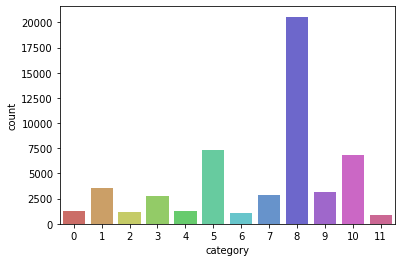

In [592]:
figure()
sb.countplot(x='category', data=merged, palette='hls')
show()

Stemmer

In [593]:
!git clone https://github.com/banglakit/bengali-stemmer.git

fatal: destination path 'bengali-stemmer' already exists and is not an empty directory.


In [594]:
cd "/content/bengali-stemmer"


/content/bengali-stemmer


In [595]:
from bengali_stemmer.rafikamal2014 import RafiStemmer
stemmer = RafiStemmer()
stemmer.stem_word('কেজিতে')

'কেজি'

Stopwords

In [596]:
!pip install stopwordsiso
import stopwordsiso as stopwords

In [597]:
stop_words = stopwords.has_lang("th")
stop_words = stopwords.stopwords("bn")
print(stop_words)
print(len(stop_words))

{'ইত্যাদি', 'নিজেই', 'কী', 'যথেষ্ট', 'এই', 'তারৈ', 'জানায়', 'যা', 'উনি', 'হাজার', 'করেই', 'তখন', 'অন্য', 'দেখা', 'বেশ', 'প্রায়', 'নিয়ে', 'সেটি', 'পাওয়া', 'করবে', 'কোনো', 'আমি', 'র', 'লক্ষ', 'সঙ্গেও', 'করলেন', 'এক্', 'ওকে', 'একে', 'হওয়া', 'যাওয়ার', 'গিয়ে', 'তথা', 'তাদের', 'তো', 'হয়', 'নেওয়া', 'হয়েছিল', 'থেকেও', 'হওয়ায়', 'যাতে', 'ওর', 'করিতে', 'আর', 'দুটি', 'দেওয়া', 'জানতে', 'পেয়ে', 'কাছ', 'ধরা', 'কি', 'বিনা', 'এদের', 'কেউই', 'রেখে', 'পি', 'অনেক', 'কাউকে', 'গেলে', 'যার', 'যাবে', 'বিষয়টি', 'জনকে', 'যারা', 'কখনও', 'হয়ে', 'এ', 'ফিরে', 'বাদে', 'কাছে', 'যদি', 'হচ্ছে', 'আমাদের', 'হইতে', 'তবু', 'এরা', 'কোন', 'অথবা', 'সহ', 'হইবে', 'ভাবেই', 'হওয়ার', 'সব', 'কিছুই', 'একবার', 'হয়', 'হোক', 'যতটা', 'দু', 'যাকে', 'জ্নজন', 'আগামী', 'প্রভৃতি', 'হন', 'হবে', 'দেয়', 'সামনে', 'বন', 'করি', 'দেওয়া', 'নাই', 'এতটাই', 'এস', 'এমনকী', 'শুধু', 'হত', 'ঐ', 'করছেন', 'নিয়ে', 'শুরু', 'হয়েই', 'পরেই', 'পক্ষে', 'যখন', 'কয়েক', 'জানিয়েছে', 'মধ্যভাগে', 'কিন্তু', 'নেওয়ার', 'ছাড়া', 'ও', 'দিয়েছে', 'বলেন', 'তাঁ

BNLP Toolkit

In [598]:
# https://bnlp.readthedocs.io/en/latest/
# https://github.com/banglakit/awesome-bangla

!pip install bnlp_toolkit

In [599]:
from bnlp.corpus import stopwords, punctuations

In [600]:
stopwordsBNLP = stopwords()
print(len(stopwordsBNLP))
print(punctuations)

398
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~।ঃ


# Data Preprocessing

In [601]:
merged['label'].value_counts()

1    49130
0     3487
Name: label, dtype: int64

Temporary Dataset Preparation

In [602]:
total_len = 3448
negative_df = merged[merged['label']==0].head(total_len)
positive_df = merged[merged['label']==1].head(total_len)

In [603]:
#merging df & df1
merge = [negative_df,positive_df]
merged = pd.concat(merge)
merged.shape

(6896, 6)

In [604]:
#shuffle
merged = merged.sample(frac=1).reset_index(drop=True)
merged

,domain,date,category,headline,content,label
0,14,2018-10-11,5,লন্ড‌নে বিএন‌পি ও আওয়ামী লী‌গের বি‌ক্ষোভ,২১ আগস্ট গ্রে‌নেড হামলা মামলার রা‌য়ের পর লন্ড‌...,1
1,31,2018-07-18,2,২৪ ঘন্টা আগেই জেনে নিন আপনার এইচএসসি রেজাল্ট !!,২৪ ঘন্টা আগেই অনলাইনে চেক করে দেখে নিতে পারেন ...,0
2,72,2018-09-21,8,‘দ্বীনি শিক্ষার কারিক্যুলাম প্রণয়নের প্রয়াস চলছে’,নিজস্ব প্রতিবেদক : ধর্মমন্ত্রী অধ্যক্ষ মতিউর র...,0
3,39,2018-10-10,4,মোটরসাইকেল উৎপাদনে বিনিয়োগ বাড়ানোর পরামর্শ শিল...,অর্থনৈতিক রিপোর্টার ॥ সংযোজনের পরিবর্তে মোটরসা...,1
4,31,2018-09-23,7,দুই বছরের বেশি সম্পর্ক ব্রেকআপ করলে হবে জেল -স...,সম্পর্কের ব্রেকাপেরও শাস্তির আইন ঘোষনা করল সুপ...,0
...,...,...,...,...,...,...
6891,55,2018-09-20,8,"বঙ্গোপসাগরে লঘুচাপ, সারাদেশে তীব্র গরম",বঙ্গোপসাগরে একটি লঘুচাপ সৃষ্টি হওয়ায় সমুদ্রবন্...,0
6892,51,2018-10-11,8,বিভিন্ন জেলায় সড়ক দুর্ঘটনায় নিহত ১১,সড়ক দুর্ঘটনায় বুধবার বিভিন্ন জেলায় ১১ জন নিহত ...,1
6893,52,2018-10-10,5,বিশ্ব গণমাধ্যমে গ্রেনেড হামলা মামলার রায়,বিশ্বের প্রধান প্রধান সংবাদ মাধ্যমে গুরুত্বের ...,1
6894,13,2018-10-10,9,খুনিদের সর্বোচ্চ শাস্তি প্রত্যাশা আইভিপুত্র পা...,ঢাকা: ২১ আগস্ট গ্রেনেড হামলা মামলার যুগান্তকার...,1


Train-Test Split

In [605]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(merged['content'], merged['label'], test_size=0.2)

Content

In [606]:
from bnlp.corpus.util import remove_stopwords
from bnlp import NLTKTokenizer

def removeForeign(word):
  a = "".join(i for i in word if 2432 <= ord(i) <= 2559)
  return a

def makeRemoveHyperLink(text):
  result = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)
  return result

def MakeHTMLremove(text):
  '''
  result = re.compile('(<.*?>)')
  result = result.sub(r'', text) 
  '''
  cleancode = re.compile('<code>.*?</code>')
  cleanr = re.compile('<.*?>')
  cleanentity = re.compile('&.*;')
  cleantext = re.sub(cleancode, '', text)
  cleantext = re.sub(cleanr, ' ', cleantext)
  cleantext = re.sub(cleanentity, ' ', cleantext)
  
  return cleantext

def cleaning(updated):
  
  #html remove
  updated= updated.apply(lambda x: MakeHTMLremove(x))
  #hyperlink remove
  updated = updated.apply(lambda x: makeRemoveHyperLink(x))
  # tokenizer
  bnltk = NLTKTokenizer()
  updated = updated.apply(lambda x: bnltk.word_tokenize(x))
  # remove punctuations
  updated = updated.apply(lambda x: [item for item in x if item not in punctuations])
  # remove stop words
  updated = updated.apply(lambda x: [item for item in x if item not in stopwordsBNLP])
  # remove foreign words
  updated = updated.apply(lambda x: [ removeForeign(item) for item in x ])
  # stripping
  updated = updated.apply(lambda x: [item.strip() for item in x ])
  # remove numbers
  updated = updated.apply(lambda x: [re.sub(r'[০১২৩৪৫৬৭৮৯\.]+', '', item) for item in x ])
  # stemming
  updated = updated.apply(lambda x: [stemmer.stem_word(item) for item in x ])
  
  
  return updated
'''
def cleaning(merged):
  merged['content'] = merged['content'].str.replace('[^\w\s]','')
  merged['content'] = merged['content'].str.split(' ')
  merged['content'] = merged['content'].apply(lambda x: [item for item in x if item not in stopwordsBNLP])
  #merged['content'] = merged['content'].apply(lambda x: [item for item in x if item not in punctuations])
  merged['content'] = merged['content'].apply(lambda x: [stemmer.stem_word(y) for y in x])
  
  return merged
'''


"\ndef cleaning(merged):\n  merged['content'] = merged['content'].str.replace('[^\\w\\s]','')\n  merged['content'] = merged['content'].str.split(' ')\n  merged['content'] = merged['content'].apply(lambda x: [item for item in x if item not in stopwordsBNLP])\n  #merged['content'] = merged['content'].apply(lambda x: [item for item in x if item not in punctuations])\n  merged['content'] = merged['content'].apply(lambda x: [stemmer.stem_word(y) for y in x])\n  \n  return merged\n"

In [607]:
merged[:2]

,domain,date,category,headline,content,label
0,14,2018-10-11,5,লন্ড‌নে বিএন‌পি ও আওয়ামী লী‌গের বি‌ক্ষোভ,২১ আগস্ট গ্রে‌নেড হামলা মামলার রা‌য়ের পর লন্ড‌...,1
1,31,2018-07-18,2,২৪ ঘন্টা আগেই জেনে নিন আপনার এইচএসসি রেজাল্ট !!,২৪ ঘন্টা আগেই অনলাইনে চেক করে দেখে নিতে পারেন ...,0


In [608]:
preprocessed_train=cleaning(x_train.copy())
preprocessed_train = preprocessed_train.apply(lambda x: "".join(" "+item for item in x))
preprocessed_train

3726     নুডলস তেহেরী বিরানী গরুর মাংস পায়েস বিখ্যাত র...
6367     যুক্তরাজ্য পররাষ্ট্রমন্ত্রী জেরেমি হান্ট সৌদি...
6878     সাজ আগাগোড়া একটু পছন্দ কর ডিপ লিপস্টিক লাগি ...
305      রাজধানীর ফার্মগেট বাস কলেজছাত্রীর শরীর হাত দে...
2943     প্রবল স্রোত তোড় সাগর মোহনা মাছ ধর  ট্রল ডুব ব...
                              ...                        
4797     সাবেক প্রধানমন্ত্রী বিএনপি চেয়ারপারসন বেগম খা...
4572     টি মুসলিম দেশ একত্রিত বিশাল ইসলামি সেনাবাহিনী...
4176     চীন জাপান শক্তি প্রদর্শন কেন্দ্রবিন্দু হ ওঠ শ...
365       আগস্ট গ্রেনেড হামলা মামল রা  ফরমায়েশি রা  মন...
3805     মার্কিন প্রবাসী সৌদি সরকার কঠোর সমালোচক জামাল...
Name: content, Length: 5516, dtype: object

In [609]:
preprocessed_test=cleaning(x_test.copy())
preprocessed_test = preprocessed_test.apply(lambda x: "".join(" "+item for item in x))
preprocessed_test

6179     বয়স অনেক বিদা ঘন্ বাজ অভিষেক হ্যাঁ  বছর বয়স প...
6084     দিনাজপুর হি সীমান্ত রায়ভাগ এলাকা অভিযান চালি ...
3593     ফরিদপুর ট্রাকমাহেন্দ্র সংঘর্ষ শিক্ষকসহ দুজন ন...
6485     নিজস্ব প্রতিবেদক আরটিএনএন ঢাকা  আগস্ট গ্রেনেড...
1849     ইনজুরির কারণ একমাস মাঠ বাহির জুভেন্টাস উইঙ্গ ...
                              ...                        
3531     জান রুম একা থাক এক মজা কেউ আপনা দেখব খুশি যেগ...
4306     জাসপ্রিত বুমরাহ  ইনিংস তম ওভার দ্বিতী ম ডিপ ম...
657      প্রধানমন্ত্রী শেখ হাসিনা জাতিসংঘ পরিষ তম অধিব...
4467     সাভার মৌ বেগম  নাম এক গার্মেন্ট শ্রমিক হত্য ল...
3924     রাজধানীর বঙ্গবন্ধু এভিনিউ  সাল  আগস্ট ভয়াবহ গ...
Name: content, Length: 1380, dtype: object

Tf-IDF vectorizer

In [610]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [611]:
tfidf_vectorizer=TfidfVectorizer()
tfidf_train=tfidf_vectorizer.fit_transform(preprocessed_train)
tfidf_test=tfidf_vectorizer.transform(preprocessed_test)
tfidf_train.shape

(5516, 8091)

# Model Selection

In [612]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB

In [613]:
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(n_estimators=100),
         "Linear Support Vector" : SVC(kernel='rbf', C=1, gamma=1),
         "naive_bayes": MultinomialNB(),
         "Decision tree": DecisionTreeClassifier(),
          "XGBoost" : XGBClassifier(),
          "Passive_Aggressive" : PassiveAggressiveClassifier(max_iter=50)
            }

In [614]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
  # Make a list to keep model scores
  model_scores = {}
  # Loop through models
  for name, model in models.items():
    print(name)
    # Fit the model to the data
    model.fit(X_train, y_train)
    # Evaluate the model and append its score to model_scores
    model_scores[name] = model.score(X_test, y_test)
  return model_scores

In [615]:
model_scores = fit_and_score(models=models,
                             X_train=tfidf_train,
                             X_test=tfidf_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

KNN
Logistic Regression
Random Forest
Linear Support Vector
naive_bayes
Decision tree
XGBoost
Passive_Aggressive


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


{'Decision tree': 0.7746376811594203,
 'KNN': 0.7862318840579711,
 'Linear Support Vector': 0.855072463768116,
 'Logistic Regression': 0.7963768115942029,
 'Passive_Aggressive': 0.8115942028985508,
 'Random Forest': 0.8420289855072464,
 'XGBoost': 0.8130434782608695,
 'naive_bayes': 0.7673913043478261}

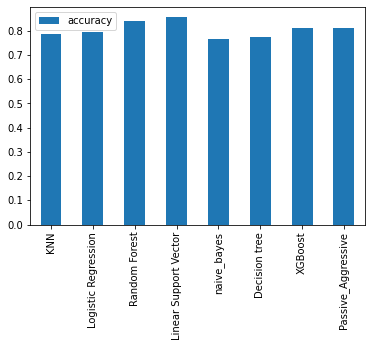

In [616]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

In [617]:
# # Initialize the PassiveAggressiveClassifier and fit training sets
# pa_classifier=PassiveAggressiveClassifier(max_iter=50)
# pa_classifier.fit(tfidf_train,y_train)

In [618]:
# # Predict and calculate accuracy
# y_pred=pa_classifier.predict(tfidf_test)
# score=accuracy_score(y_test,y_pred)
# print(f'Accuracy: {round(score*100,2)}%')